In [1]:
#importing Required Libraries to run code
import glob
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage.feature import hog
import os
from PIL import Image, ImageOps

%matplotlib inline

user = os.environ["HOME"]

In [2]:
# read in image paths with glob module
pedestrian_image_arr = glob.glob(user+'/qub_project/pedestrian_classifier/INRIAPerson/Train/pos/*.*')

# read in images, resize and format to list
pedestrian_images_original = []
for imagePath in pedestrian_image_arr:
    desiredSize = (368, 368)
    readImage = cv.imread(imagePath)
    resizeImage = cv.resize(readImage, desiredSize, interpolation = cv.INTER_AREA)
    rgbImage = cv.cvtColor(resizeImage, cv.COLOR_BGR2RGB)
    pedestrian_images_original.append(rgbImage)
    

print('Reading of Pedestrian Images Done')
print('Number of Pedestrian Images Loaded - '+str(len(pedestrian_image_arr)))

Reading of Pedestrian Images Done
Number of Pedestrian Images Loaded - 614


In [3]:
# read in image paths with glob module
non_pedestrian_image_arr = glob.glob(user+'/qub_project/pedestrian_classifier/INRIAPerson/Train/neg/*.*')

# read in images, resize and format to list
non_pedestrian_images_original = []
for imagePath in non_pedestrian_image_arr:
    desiredSize = (368, 368)
    readImage = cv.imread(imagePath)
    resizeImage = cv.resize(readImage, desiredSize, interpolation = cv.INTER_AREA)
    rgbImage = cv.cvtColor(resizeImage, cv.COLOR_BGR2RGB)
    non_pedestrian_images_original.append(rgbImage)
    
print('Reading of Non Pedestrian Images Done')
print('Number of Non Pedestrian Images Loaded - '+str(len(non_pedestrian_image_arr)))    

Reading of Non Pedestrian Images Done
Number of Non Pedestrian Images Loaded - 1218


Shape of Pedestrian Image (368, 368, 3)
Shape of Non Pedestrian Image (368, 368, 3)


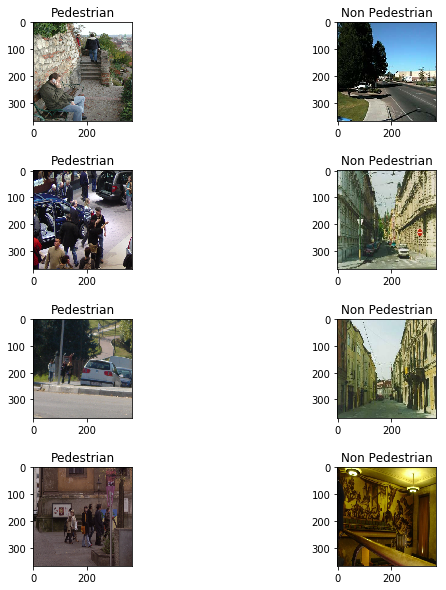

In [21]:
# Visualizing the Pedestrian and Non Pedestrian Images

f, axes = plt.subplots(4,2, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)

for index in range(4):
    pedestrian = random.randint(0, len(pedestrian_images_original)-1)
    non_pedestrian = random.randint(0, len(non_pedestrian_images_original)-1)
    axes[index,0].imshow(pedestrian_images_original[pedestrian])
    axes[index,0].set_title("Pedestrian")
    axes[index,1].imshow(non_pedestrian_images_original[non_pedestrian])
    axes[index,1].set_title("Non Pedestrian")
    
print("Shape of Pedestrian Image " +  str(pedestrian_images_original[pedestrian].shape))
print("Shape of Non Pedestrian Image " +  str(non_pedestrian_images_original[non_pedestrian].shape))

In [22]:
# General method to extact the HOG (image descriptor) of the image

def GetFeaturesFromHog(image,orient,cellsPerBlock,pixelsPerCell, visualise= False, feature_vector_flag=True):
    
#     call with two outputs if visualise == True
    if(visualise==True):
        hog_features, hog_image = hog(image, orientations=orient,
                          pixels_per_cell=(pixelsPerCell, pixelsPerCell), 
                          cells_per_block=(cellsPerBlock, cellsPerBlock), 
                          visualise=True, feature_vector=feature_vector_flag)
        return hog_features, hog_image
#     otherwise call with one output
    else:
        hog_features = hog(image, orientations=orient,
                          pixels_per_cell=(pixelsPerCell, pixelsPerCell), 
                          cells_per_block=(cellsPerBlock, cellsPerBlock), 
                          visualise=False, feature_vector=feature_vector_flag)
        return hog_features

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


Feature Vector Length Returned is  17424
No of features that can be extracted from image  135424


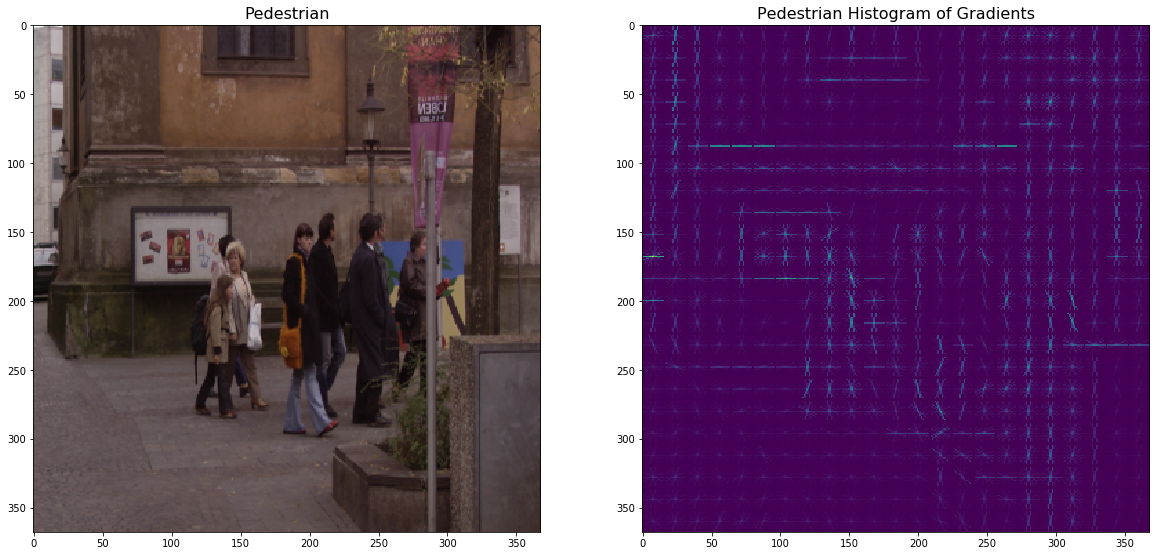

In [23]:
#testing HOG on test images

# test on pedestrian image
pedestrian_image = pedestrian_images_original[pedestrian]
pedestrian_image = cv.cvtColor(pedestrian_image, cv.COLOR_RGB2YUV)
pedestrian_image_channel_0 = pedestrian_image[:,:,0]

pedestrian_feature_0,pedestrian_hog_img_0 = GetFeaturesFromHog(pedestrian_image_channel_0,9,2,16,visualise=True,feature_vector_flag=True)

f, axes= plt.subplots(1,2,figsize=(20,10))
axes[0].imshow(pedestrian_images_original[pedestrian])
axes[0].set_title("Pedestrian", fontsize=16)
axes[1].imshow(pedestrian_hog_img_0)
axes[1].set_title("Pedestrian Histogram of Gradients", fontsize=16)

print("Feature Vector Length Returned is ",len(pedestrian_feature_0))
print("No of features that can be extracted from image ",len(pedestrian_hog_img_0.ravel()))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


Feature Vector Length Returned is  17424
No of features that can be extracted from image  135424


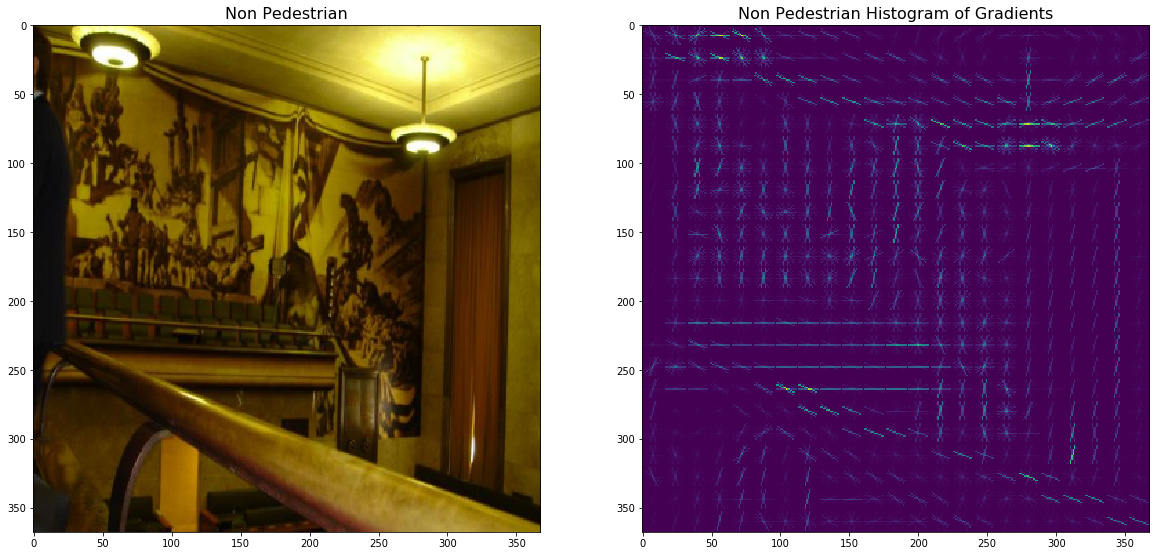

In [24]:
#testing HOG on test images

# test on non-car image
non_pedestrian_image = non_pedestrian_images_original[non_pedestrian]
non_pedestrian_image = cv.cvtColor(non_pedestrian_image, cv.COLOR_RGB2YUV)
non_pedestrian_image_channel_0 = non_pedestrian_image[:,:,0]

non_pedestrian_feature_0,non_pedestrian_hog_img_0 = GetFeaturesFromHog(non_pedestrian_image_channel_0,9,2,16,visualise=True,feature_vector_flag=True)

f, axes= plt.subplots(1,2,figsize=(20,10))
axes[0].imshow(non_pedestrian_images_original[non_pedestrian])
axes[0].set_title("Non Pedestrian", fontsize=16)
axes[1].imshow(non_pedestrian_hog_img_0)
axes[1].set_title("Non Pedestrian Histogram of Gradients", fontsize=16)

print("Feature Vector Length Returned is ",len(non_pedestrian_feature_0))
print("No of features that can be extracted from image ",len(non_pedestrian_hog_img_0.ravel()))

In [8]:
#Convert Image Color Space function
def ConvertImageColorspace(pedestrian_image, colorspace):
    return cv.cvtColor(pedestrian_image, colorspace)

In [9]:

# Method to extract the features function found online

def ExtractFeatures(images,orientation,cellsPerBlock,pixelsPerCell, convertColorspace=False):
    featureList=[]
    imageList=[]
    for image in images:
        if(convertColorspace==True):
            image= cv.cvtColor(image, cv.COLOR_RGB2YUV)
        local_features_1=GetFeaturesFromHog(image[:,:,0],orientation,cellsPerBlock,pixelsPerCell, False, True)
        local_features_2=GetFeaturesFromHog(image[:,:,1],orientation,cellsPerBlock,pixelsPerCell, False, True)
        local_features_3=GetFeaturesFromHog(image[:,:,2],orientation,cellsPerBlock,pixelsPerCell, False, True)
        x=np.hstack((local_features_1,local_features_2,local_features_3))
        featureList.append(x)
    return featureList

In [10]:
%%time
# Extract features from all images in pedestrian and non pedestrian datasets 
orientations = 9
cellsPerBlock = 2
pixelsPerBlock = 16
convertColorSpace = True
pedestrianFeatures = ExtractFeatures(pedestrian_images_original,orientations,cellsPerBlock,pixelsPerBlock, convertColorSpace)
nonPedestrianFeatures = ExtractFeatures(non_pedestrian_images_original,orientations,cellsPerBlock,pixelsPerBlock, convertColorSpace)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


CPU times: user 1min 30s, sys: 3.94 s, total: 1min 34s
Wall time: 1min 34s


In [11]:
featuresList= np.vstack([pedestrianFeatures, nonPedestrianFeatures])
print("Shape of features list is ", featuresList.shape)
labelList= np.concatenate([np.ones(len(pedestrianFeatures)), np.zeros(len(nonPedestrianFeatures))])
print("Shape of label list is ", labelList.shape)

Shape of features list is  (1832, 52272)
Shape of label list is  (1832,)


In [12]:
# train test split of data - test data 20% of train data

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(featuresList, labelList, test_size=0.2, shuffle=True)

In [13]:
# normalization and scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled= scaler.transform(X_test)

In [14]:
%%time
# Train a Linear Support Vector Machine classifer
from sklearn.svm import LinearSVC
classifier1= LinearSVC()
classifier1.fit(X_train,Y_train)
print("Accuracy of SVC is  ", classifier1.score(X_test,Y_test) )

Accuracy of SVC is   0.9128065395095368
CPU times: user 48.4 s, sys: 1.75 s, total: 50.2 s
Wall time: 52.2 s


In [15]:
# function to draw sliding Windows

import matplotlib.image as mpimg

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    
    for bbox in bboxes:
        r=random.randint(0,255)
        g=random.randint(0,255)
        b=random.randint(0,255)
        color=(r, g, b)
        # Draw a rectangle given bbox coordinates
        cv.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

In [16]:
# function to find the windows on which we are going to run the classifier

def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.9, 0.9)):
   
    if x_start_stop[0] == None:
        x_start_stop[0]=0
    if x_start_stop[1] == None:
        x_start_stop[1]=img.shape[1]
    if y_start_stop[0] ==  None:
        y_start_stop[0]= 0
    if y_start_stop[1] ==  None:
        y_start_stop[1]=img.shape[0]
    
    
    window_list = []
    image_width_x= x_start_stop[1] - x_start_stop[0]
    image_width_y= y_start_stop[1] - y_start_stop[0]
     
    windows_x = np.int( 1 + (image_width_x - xy_window[0])/(xy_window[0] * xy_overlap[0]))
    windows_y = np.int( 1 + (image_width_y - xy_window[1])/(xy_window[1] * xy_overlap[1]))
    
    modified_window_size= xy_window
    for i in range(0,windows_y):
        y_start = y_start_stop[0] + np.int( i * modified_window_size[1] * xy_overlap[1])
        for j in range(0,windows_x):
            x_start = x_start_stop[0] + np.int( j * modified_window_size[0] * xy_overlap[0])
            
            x1 = np.int( x_start +  modified_window_size[0])
            y1= np.int( y_start + modified_window_size[1])
            window_list.append(((x_start,y_start),(x1,y1)))
    return window_list

In [17]:
# function that returns the refined Windows
# From Refined Windows we mean that the windows where the classifier predicts the output to be a car

def DrawPeople(image,windows, converColorspace=False):
    refinedWindows=[]
    for window in windows:
        
        start= window[0]
        end= window[1]
        clippedImage=image[start[1]:end[1], start[0]:end[0]]
        
        if(clippedImage.shape[1] == clippedImage.shape[0] and clippedImage.shape[1]!=0):
            
            clippedImage=cv.resize(clippedImage, (368,368))
            
            f1=ExtractFeatures([clippedImage], 9 , 2 , 16,converColorspace)
        
            predictedOutput=classifier1.predict([f1[0]])
            if(predictedOutput==1):
                refinedWindows.append(window)
        
    return refinedWindows

In [18]:
# trying out SubSampling using HOG but not able to go through as feature size is not the same.

def DrawPeopleOptimised(image, image1, image2,windows, converColorspace=False):
    refinedWindows=[]
    for window in windows:
        
        start= window[0]
        end= window[1]
        clippedImage=image[start[1]:end[1], start[0]:end[0]]
        clippedImage1=image1[start[1]:end[1], start[0]:end[0]]
        clippedImage2=image2[start[1]:end[1], start[0]:end[0]]
        
        if(clippedImage.shape[1] == clippedImage.shape[0] and clippedImage.shape[1]!=0):
            
            clippedImage=cv.resize(clippedImage, (368,368)).ravel()
            clippedImage1=cv.resize(clippedImage1, (368,368)).ravel()
            clippedImage2=cv.resize(clippedImage2, (368,369)).ravel()
            
            #f1=ExtractFeatures([clippedImage], 9 , 2 , 16,converColorspace)
            f1= np.hstack((clippedImage,clippedImage1,clippedImage2))
            f1=scaler.transform(f1.reshape(1,-1))   
            print(f1.shape)
            predictedOutput=classifier1.predict([f1[0]])
            if(predictedOutput==1):
                refinedWindows.append(window)
        
    return refinedWindows

Total No of windows are  470


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


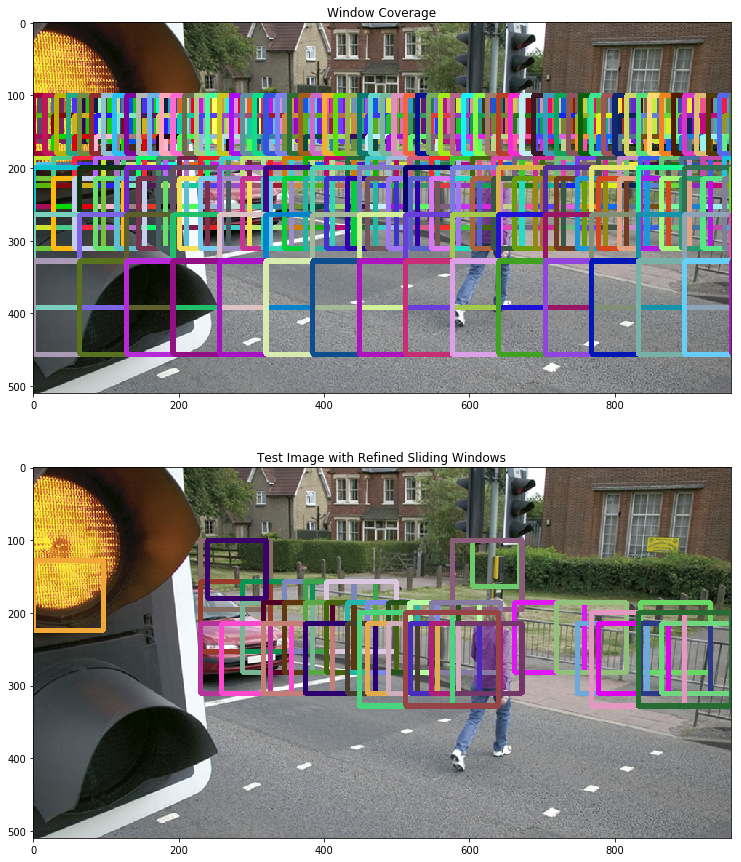

In [19]:
#testing our functions of slide_window and draw window. Defining here dummy windows

image = mpimg.imread('test1.jpg')

windows1 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[100,164], 
                    xy_window=(64,64), xy_overlap=(0.15, 0.15))
windows4 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[100,180], 
                    xy_window=(80,80), xy_overlap=(0.2, 0.2))
windows2 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[100,312], 
                    xy_window=(96,96), xy_overlap=(0.3, 0.3))
windows3 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[200,460], 
                    xy_window=(128,128), xy_overlap=(0.5, 0.5))


windows = windows1 + windows2 +  windows3 + windows4
print("Total No of windows are ",len(windows))
refinedWindows=DrawPeople(image,windows, True)



f,axes= plt.subplots(2,1, figsize=(30,15))

window_img = draw_boxes(image, windows) 

axes[0].imshow(window_img)
axes[0].set_title("Window Coverage")

window_img = draw_boxes(image, refinedWindows) 

axes[1].set_title("Test Image with Refined Sliding Windows")
axes[1].imshow(window_img)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


Feature Vector Length Returned is  63720
No of features that can be extracted from image  489600


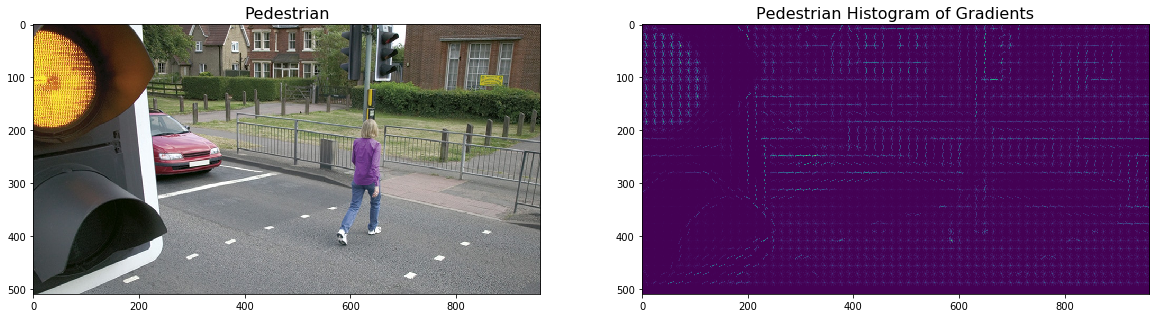

In [20]:
#testing HOG on test images

# test on pedestrian image
pedestrian_image = mpimg.imread('test1.jpg')
pedestrian_image = cv.cvtColor(pedestrian_image, cv.COLOR_RGB2YUV)
pedestrian_image_channel_0 = pedestrian_image[:,:,0]

pedestrian_feature_0,pedestrian_hog_img_0 = GetFeaturesFromHog(pedestrian_image_channel_0,9,2,16,visualise=True,feature_vector_flag=True)

f, axes= plt.subplots(1,2,figsize=(20,20))
axes[0].imshow(mpimg.imread('test1.jpg'))
axes[0].set_title("Pedestrian", fontsize=16)
axes[1].imshow(pedestrian_hog_img_0)
axes[1].set_title("Pedestrian Histogram of Gradients", fontsize=16)

print("Feature Vector Length Returned is ",len(pedestrian_feature_0))
print("No of features that can be extracted from image ",len(pedestrian_hog_img_0.ravel()))